## Import module

In [20]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse


## Import data

In [21]:
# Import the data
namefile = "DRIFT_DATA_TRAIN.csv"
df = pd.read_csv(namefile)
df_training = df[:]
y = np.array(df_training[["u_buoy","v_buoy"]])

## Model 1 : only wind velocities

In [22]:
x_1 = np.array(df_training[["u_ERA5","v_ERA5"]])

In [23]:
model_1 = linear_model.LinearRegression()
model_1.fit(x_1,y)
print("The score of model 1 is :",model_1.score(x_1,y))
print("The MSE of model 1 is :",mse(model_1.predict(x_1),y))

The score of model 1 is : 0.5568882884896664
The MSE of model 1 is : 28.149163141838002


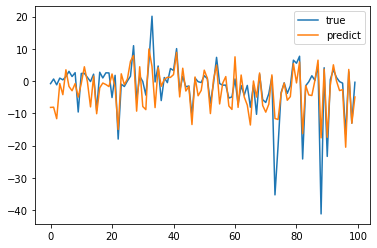

In [24]:
plt.plot(y.T[0][:100],label="true")
plt.plot(model_1.predict(x_1).T[0][:100],label="predict")
plt.legend()

## Model 2 : Adding positions x and y

In [25]:
x_2 = np.array(df_training[["u_ERA5","v_ERA5","x_EASE","y_EASE"]])

In [26]:
model_2 = linear_model.LinearRegression()
model_2.fit(x_2,y)
print("The score of model 2 is :",model_2.score(x_2,y))
print("The MSE of model 2 is :",mse(model_2.predict(x_2),y))

The score of model 2 is : 0.5741515004293527
The MSE of model 2 is : 27.071582419778892


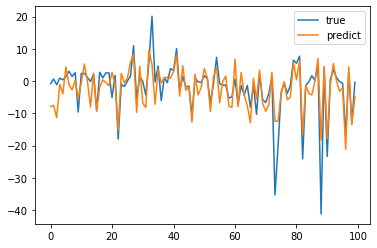

In [27]:
plt.plot(y.T[0][:100],label="true")
plt.plot(model_2.predict(x_2).T[0][:100],label="predict")
plt.legend()

## Model 3 :Adding the ice concentration

In [28]:
x_3 = np.array(df_training[["u_ERA5","v_ERA5","x_EASE","y_EASE","sic_CDR"]])

In [29]:
model_3 = linear_model.LinearRegression()
model_3.fit(x_3,y)
print("The score of model 3 is :",model_3.score(x_3,y))
print("The MSE of model 3 is :",mse(model_3.predict(x_3),y))

The score of model 3 is : 0.5761313274567401
The MSE of model 3 is : 26.94366488101931


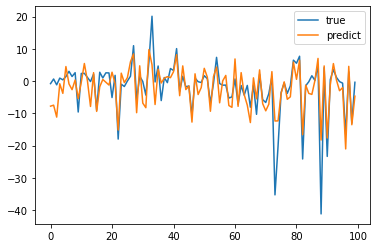

In [30]:
plt.plot(y.T[0][:100],label="true")
plt.plot(model_3.predict(x_3).T[0][:100],label="predict")
plt.legend()

## Model 4 : Adding the ice thickness

In [31]:
x_4 = np.array(df_training[["u_ERA5","v_ERA5","x_EASE","y_EASE","sic_CDR","h_piomas"]])

In [32]:
model_4 = linear_model.LinearRegression()
model_4.fit(x_4,y)
print("The score of model 4 is :",model_4.score(x_4,y))
print("The MSE of model 4 is :",mse(model_4.predict(x_4),y))

The score of model 4 is : 0.5774371207625949
The MSE of model 4 is : 26.859615509129654


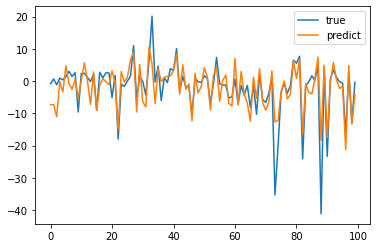

In [33]:
plt.plot(y.T[0][:100],label="true")
plt.plot(model_4.predict(x_4).T[0][:100],label="predict")
plt.legend()

## Adding the coastal distance

In [34]:
x_5 = np.array(df_training[["u_ERA5","v_ERA5","x_EASE","y_EASE","sic_CDR","h_piomas","d2c"]])

In [35]:
model_5 = linear_model.LinearRegression()
model_5.fit(x_5,y)
print("The score of model 5 is :",model_5.score(x_5,y))
print("The MSE of model 5 is :",mse(model_5.predict(x_5),y))

The score of model 5 is : 0.5781768901041078
The MSE of model 5 is : 26.813507067623615


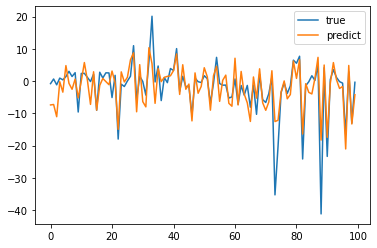

In [36]:
plt.plot(y.T[0][:100],label="true")
plt.plot(model_5.predict(x_5).T[0][:100],label="predict")
plt.legend()

## Graphics with all models

In [37]:
print("The MSE of model 1 is :",mse(model_1.predict(x_1),y))
print("The MSE of model 2 is :",mse(model_2.predict(x_2),y))
print("The MSE of model 3 is :",mse(model_3.predict(x_3),y))
print("The MSE of model 4 is :",mse(model_4.predict(x_4),y))
print("The MSE of model 5 is :",mse(model_5.predict(x_5),y))

The MSE of model 1 is : 28.149163141838002
The MSE of model 2 is : 27.071582419778892
The MSE of model 3 is : 26.94366488101931
The MSE of model 4 is : 26.859615509129654
The MSE of model 5 is : 26.813507067623615


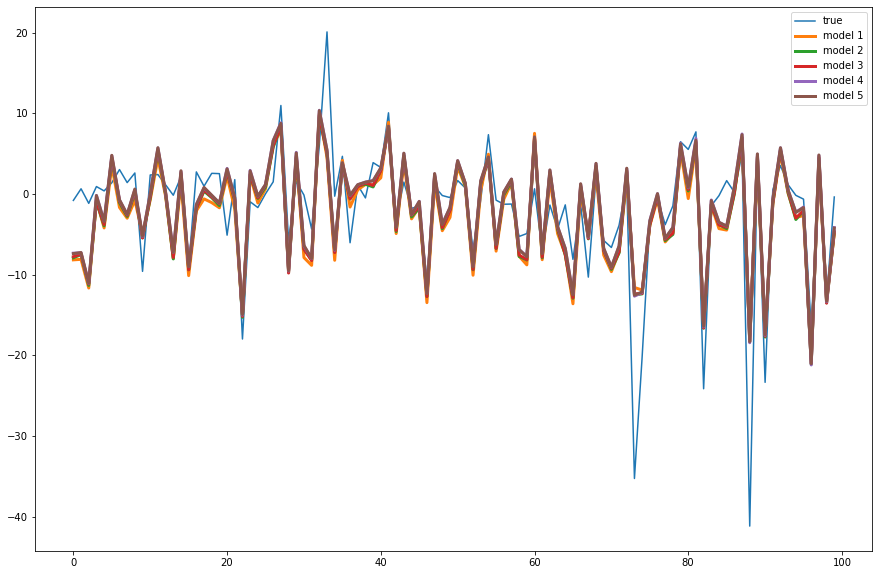

In [38]:
end_step = 100

plt.plot(y.T[0][:end_step],label="true")
plt.plot(model_1.predict(x_1).T[0][:end_step],label="model 1",linewidth=3)
plt.plot(model_2.predict(x_2).T[0][:end_step],label="model 2",linewidth=3)
plt.plot(model_3.predict(x_3).T[0][:end_step],label="model 3",linewidth=3)
plt.plot(model_4.predict(x_4).T[0][:end_step],label="model 4",linewidth=3)
plt.plot(model_5.predict(x_5).T[0][:end_step],label="model 5",linewidth=3)

plt.legend()

# change size figure
fig = plt.gcf()
fig.set_size_inches(15, 10)